# Worksheet 18

Name:  Azad Ellafi
UID: U19478001

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')

def process(df):
    # convert df['alarm (%H:%M:%S)] to df[H], df[M], df[S]
    df['H'] = df['alarm (%H:%M:%S)'].str.split(':').str[0]
    df['M'] = df['alarm (%H:%M:%S)'].str.split(':').str[1]
    df['S'] = df['alarm (%H:%M:%S)'].str.split(':').str[2]

    # Type should be integers
    df['H'] = df['H'].astype(int)
    df['M'] = df['M'].astype(int)
    df['S'] = df['S'].astype(int)

    return df

df = process(df)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   day               355 non-null    int64 
 1   alarm (%H:%M:%S)  355 non-null    object
 2   H                 355 non-null    int64 
 3   M                 355 non-null    int64 
 4   S                 355 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.0+ KB


In [2]:
# ridge regression
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(df[['day']], df[['H', 'M', 'S']])

# prediction
y_pred = model.predict([[356]])
y_pred

/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([[20.36237598, 30.47767932, 31.44721849]])

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

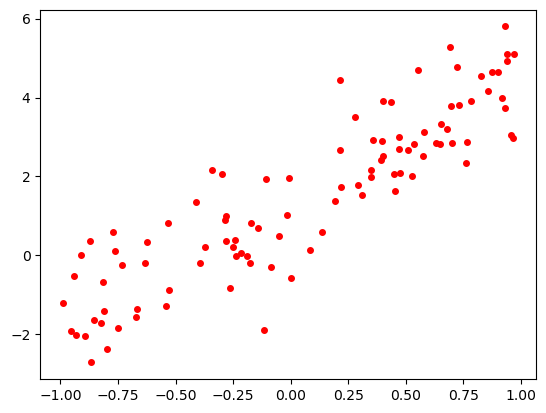

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'


SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

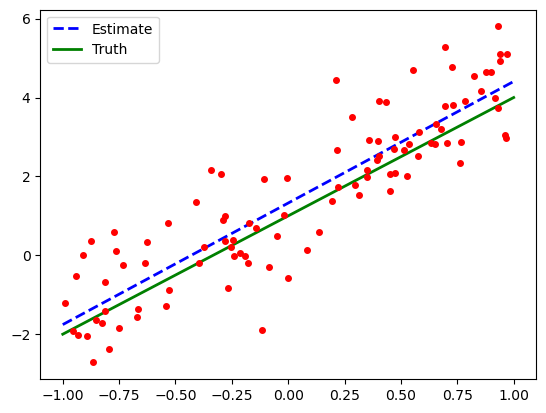

In [6]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

Beta is close to the true values 

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

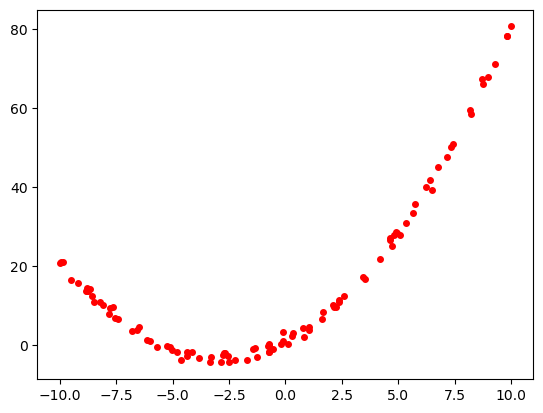

In [7]:
import numpy as np
import matplotlib.pyplot as plt
true_beta = np.array([ 1 , 3, .5 ]) # intercept and slope
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

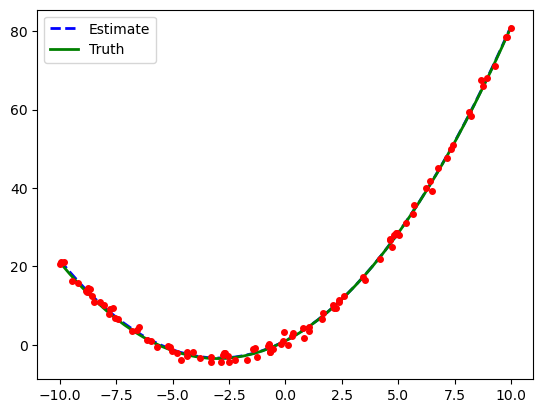

In [8]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x, x**2]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-10,10,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot**2
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot + true_beta[2] * x_plot**2, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

Estimate of beta is close to the real data

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

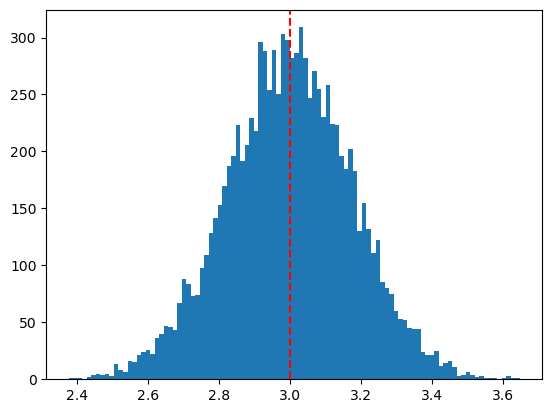

In [9]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([ 1 , 3, .5 ]) 

for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)
    xlin = x
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    betas.append(np.linalg.inv(X.T @ X) @ X.T @ y)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()